# Carbon Emission Prediction


In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sb

# Data Ingestion

In [2]:
A=pd.read_csv("D:Hitesh/dataset/Co2.csv")

In [3]:
A

,Year,Emissions(billion tons)
0,1971,0.232197
1,1972,0.241980
2,1973,0.240703
3,1974,0.258519
4,1975,0.276005
5,1976,0.294979
6,1977,0.300277
7,1978,0.286098
8,1979,0.308114
9,1980,0.321937


## Indexing


In [4]:
A.index=A.Year

In [5]:
x=A.drop("Year",axis=1);x

,Emissions(billion tons)
Year,
1971,0.232197
1972,0.241980
1973,0.240703
1974,0.258519
1975,0.276005
1976,0.294979
1977,0.300277
1978,0.286098
1979,0.308114


## Exploratory data analysis

<AxesSubplot:xlabel='Year'>

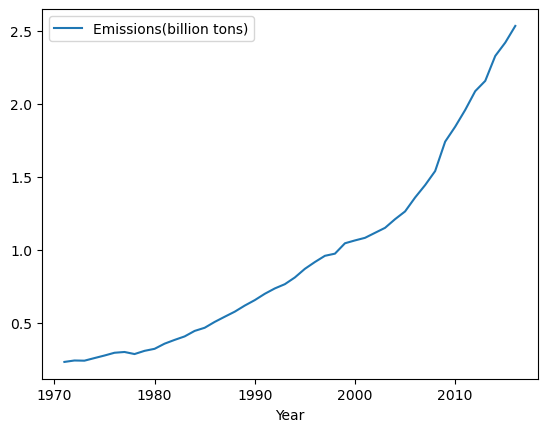

In [6]:
x.plot()

## Seasonal Decomposition

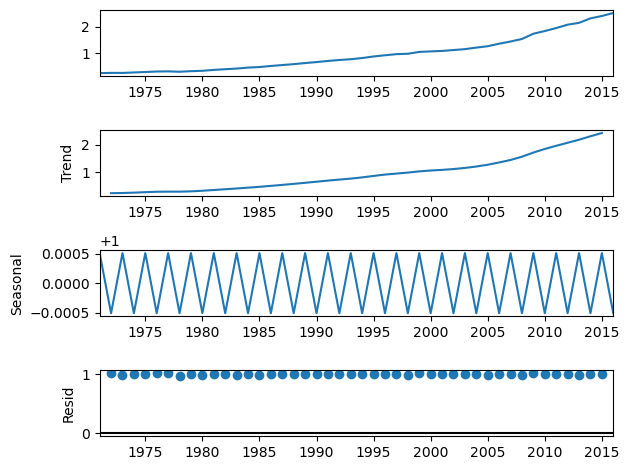

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(x,model="multiplicative",period=2).plot()
plt.show()

## ACF and PACF

In [8]:
from statsmodels.tsa.stattools import acf,pacf
a1=acf(x,nlags=3)
a2=pacf(x,nlags=3)
import statsmodels.api as sm

## ACF

In [ ]:
plot

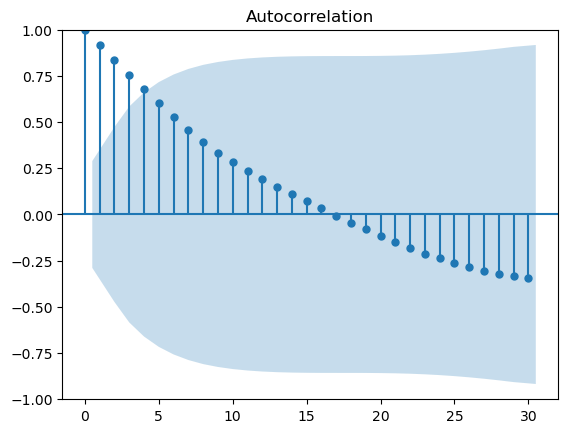

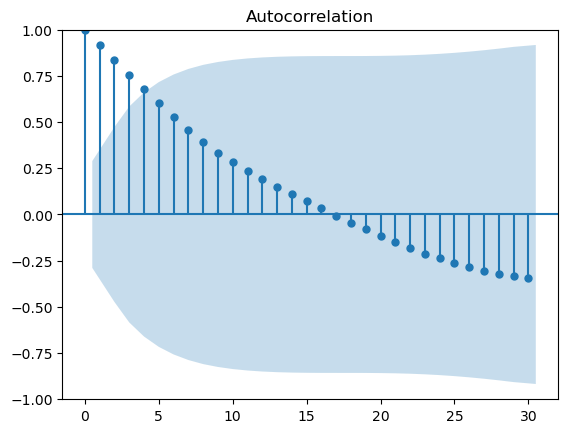

In [36]:
sm.graphics.tsa.plot_acf(x,lags=30)

## PACF

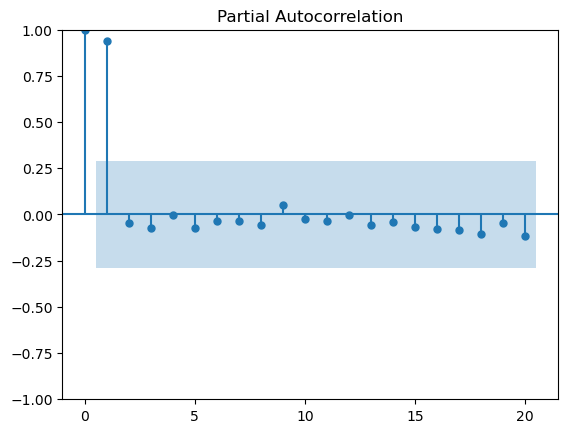

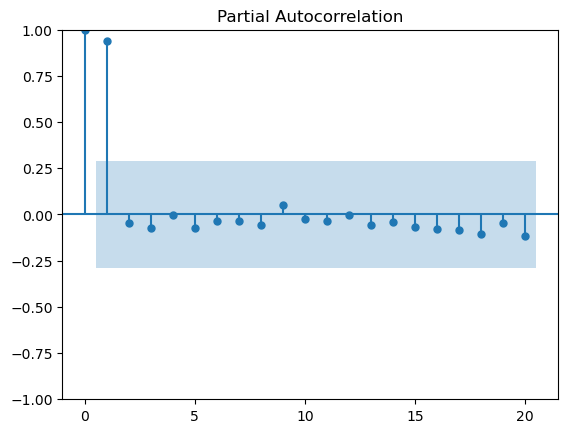

In [40]:
sm.graphics.tsa.plot_pacf(x,lags=20)

##  Test for stationary time series

## Ho= Time series is not stationary vs H1= Time series is stationary

In [11]:
from statsmodels.tsa.stattools import adfuller
a=adfuller(x)
print("ADF statistic is",a[0])
print("P-value is",a[1])
#stationary check
#pvalue less than 0.005 then it is stationary

ADF statistic is 2.5470362851557624
P-value is 0.9990634651655129


## As P-value is greater than 0.05 we accept H0, hence time series is not stationary

# Making time series stationary

In [12]:
rx=x.rolling(window=2).mean()

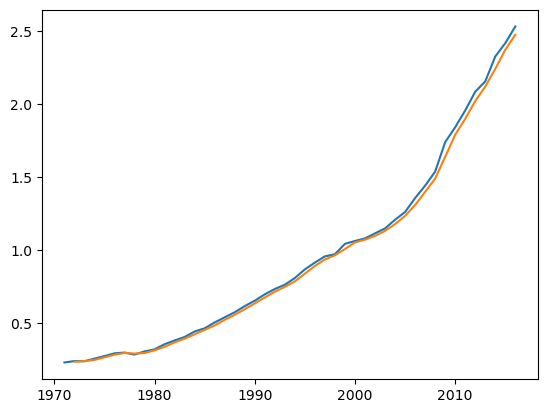

In [13]:
plt.plot(x)
plt.plot(rx)

In [14]:
lx=nm.log(x)

In [15]:
rlx=lx.rolling(window=2).std()

In [16]:
rlx

,Emissions(billion tons)
Year,
1971,NaN
1972,0.029180
1973,0.003740
1974,0.050491
1975,0.046280
1976,0.047013
1977,0.012587
1978,0.034204
1979,0.052423


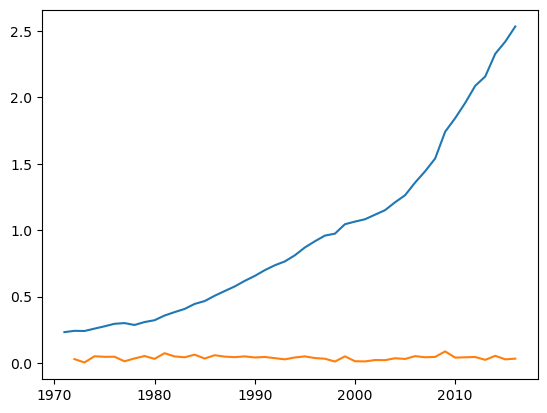

In [17]:
plt.plot(x)
plt.plot(rlx)

# we can see that after taking log the mean is stationary with respect to time. 

# Model building

## Auto-ARIMA

In [18]:
len(x["Emissions(billion tons)"])

46

In [19]:
xtr=lx[0:42]
xts=lx[42:46]

In [20]:
xts.head()

,Emissions(billion tons)
Year,
2013,0.768796
2014,0.845015
2015,0.883618
2016,0.929656


In [21]:
from pmdarima import auto_arima

In [22]:
model=auto_arima(xtr)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  87.429
Date:                Thu, 23 Feb 2023   AIC                           -170.858
Time:                        10:11:30   BIC                           -167.431
Sample:                             0   HQIC                          -169.610
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0536      0.005     10.806      0.000       0.044       0.063
sigma2         0.0008      0.000      6.334      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.95   Jarque-Bera (JB):                19.29
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.47   Skew:                            -0.94
Prob(H) (two-sided):                  0.17   Kurtosis:                         5.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
p=model.predict(n_periods=4,X=xtr)

C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [24]:
p

42    0.789182
43    0.842738
44    0.896294
45    0.949850
dtype: float64

In [25]:
prediction=nm.exp(p)

In [26]:
prediction

42    2.201595
43    2.322718
44    2.450505
45    2.585322
dtype: float64

In [27]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(xts,prediction)

1.5332637797146658

In [28]:
m1=auto_arima(lx)

In [41]:
p1=m1.predict(n_periods=34,X=lx)

C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [42]:
prediction1=nm.exp(p1)

In [43]:
prediction1

46     2.671828
47     2.817556
48     2.971232
49     3.133289
50     3.304186
51     3.484404
52     3.674451
53     3.874864
54     4.086207
55     4.309078
56     4.544105
57     4.791951
58     5.053314
59     5.328933
60     5.619585
61     5.926090
62     6.249312
63     6.590164
64     6.949606
65     7.328653
66     7.728374
67     8.149897
68     8.594410
69     9.063169
70     9.557494
71    10.078781
72    10.628501
73    11.208203
74    11.819523
75    12.464187
76    13.144011
77    13.860915
78    14.616920
79    15.414160
dtype: float64

## The estimated Carbon emission in 2050 is 15.42 billion metric ton. (approx) 

In [32]:
from statsmodels.tsa.arima.model import ARIMA

In [33]:
m=ARIMA(lx,order=(0,2,0))
m2=m.fit()

C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ACER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [34]:
pred=m2.predict()

In [35]:
prediction=nm.exp(pred);prediction

Year
1971    1.000000
1972    0.111888
1973    0.252174
1974    0.239433
1975    0.277654
1976    0.294674
1977    0.315258
1978    0.305670
1979    0.272588
1980    0.331825
1981    0.336380
1982    0.396436
1983    0.410744
1984    0.432223
1985    0.485765
1986    0.488723
1987    0.549889
1988    0.579528
1989    0.613148
1990    0.663042
1991    0.695023
1992    0.745064
1993    0.774241
1994    0.794835
1995    0.859597
1996    0.933172
1997    0.965616
1998    1.003564
1999    0.988700
2000    1.121196
2001    1.084355
2002    1.100149
2003    1.151910
2004    1.185673
2005    1.272284
2006    1.318428
2007    1.460925
2008    1.533511
2009    1.641906
2010    1.969143
2011    1.951755
2012    2.080137
2013    2.223828
2014    2.229922
2015    2.512389
2016    2.514867
Name: predicted_mean, dtype: float64